# Finding the Mass of the Supermassive Black Hole at the Center of the Milky Way Galaxy

![](orbits.gif)

## Learning/Reviewing some astronomy terms
Watch this video (https://www.youtube.com/watch?v=CWMh61yutjU&t=192s) and answer the following questions:

1. What is an astronomical unit (AU)? How many kilometers (km) are in an AU? \\
A:
2. What is parallax? \\
A:
3. What is a parsec? How many AU are in a parsec? How many km? \\
A:

## Learning/Reviewing some Background Physics:
Watch this video (https://www.youtube.com/watch?v=AKbfR5KHUm4) and answer the following questions:

1. What is Kepler's 1st law? \\
A:
2. What is an ellipse? \\
A:
3. True or False: All orbits are perfectly circular \\
A:
4. What is eccentricity? \\
A:
5. What is Kepler's 3rd law? \\
A:
6. Where in Earth's orbit is it traveling the fastest? \\
A:

## Optional: Units and Dimensional analysis
Watch this video to get a review of units and dimensional analysis (https://www.youtube.com/watch?v=AGxOWIuaBP8) \\

# Goal of this project

Kepler's laws don't just apply to our solar system, they can be applied to almost any object that is bounded by gravity to another object... for example, like a star orbiting a supermassive black hole! Kepler's 3rd law has the following form:

$$P^2 = \frac{4\pi^2 a^3}{GM}$$

*Breaking down this equation:*

- $P$ is the period of orbit, i.e., how much time it takes a star to make 1 revolution around a supermassive black hole. It has units of time, like years or seconds.
- $a$ is the semi-major axis of the orbit. For a nearly circular orbit, this is essentially just how far the star is from the supermassive black hole. It has units of distance, like AU or km.
- $M$ is the total mass of the system in question (i.e. the mass of the star + the mass of the supermassive black hole). However, often times we can ignore the mass of the smaller object and only consider the mass of the supermassive black hole and still get a really good answer! It has units of mass, like kilograms (kg) or solar-masses ($M_{\odot} = 2.0 \times 10^{30}~kg$)
- $G$ is the gravitational constant which is $G = 6.67 \times 10 ^{-11}~\frac{N}{kg^2 m^2}$, where *N* are called Newtons (units of force) and *m* are meters (units of distance, like km). \\

Another way of expressing this equation is in terms of *velocity*, how far the star travels per unit time (so the units are distance/time, like km/s). We can do this by plugging in the following definition for period by assuming a circular orbit:

$$P = \frac{2\pi a}{v}$$

Plugging this in gives:

$$v = \sqrt{\frac{GM}{a}}$$

Finally re-arranging this a bit to solve for Mass of the supermassive black hole gives:

$$M = \frac{av^2}{G}$$

*Optional: derive this yourself!*

**The goal of this project is to obtain an estimate for the mass of the supermassive blackhole at the center of the Milky-Way Galaxy by measuring the motion/velocity of stars near it!**



### Challenge 1: getting through the dust

The galactic center is ~20,000 light years from Earth (or 8,200 parsecs) hiding behind thick dust and gas that makes seeing this region in
"ordinary" light nearly impossible (e.g. the light our eyes can see). Only about 1 in every million visible light photons makes it through the dust. To solve this, astronomers look in the *infrared*, which is less susceptible to dust and thus 1 in every 10 photons makes it through the dust!

### Challenge 2: stars are tiny that far away

At distances of 8,200 parsecs, common stars look pretty tiny. If we are to find the mass of the black hole at the center of the galaxy, we need to be able to observe how these tiny stars move around it. To solve this, astronomers have utilized the largest telescope operating today: Keck telescopes. These telescopes are 10-m class telescopes, so their primary mirror is about the size of a tennis court! The larger your telescope, the smaller things you are able to see (i.e., better resolution).

### Challenge 3: what to do about the atmosphere

Looking through the atmosphere with such a large telescope is like looking through the water of a fast moving turbulent river. Light interacts with air in a similar way as it does with water. Our atmosphere is very turbulent, highly variable, and thus affects light differently in every instance. If we are to trust in our measurements of stars, we need to ensure the atmosphere isn't introducing errors. To solve this, astronomers have utilized *adaptive optics*, a technique that corrects the distorted incoming light by using a deformable mirror!

### Collecting the data
Download the data from https://drive.google.com/drive/u/0/folders/1pARePed36fYuXvAMbQwejPHK8FAud_BH

Each image is of the galactic center taken 2 years apart!

### Make sure you have photutils installed

In [ ]:
import sys
!{sys.executable} -m pip install photutils
import photutils

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 13.1 MB/s eta 0:00:00


In [ ]:
!pip install photutils

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 22.9 MB/s eta 0:00:00


In [ ]:
# Import packages
import os
import numpy as np
from astropy.io import fits
from scipy.ndimage import median_filter
import matplotlib.pyplot as plt
from photutils.detection import DAOStarFinder
from astropy.stats import sigma_clipped_stats
from photutils.aperture import CircularAperture
from astropy.visualization import simple_norm
from scipy.ndimage import shift
from astropy.time import Time
import matplotlib.cm as cm
import matplotlib.colors as colors
import photutils
import imageio

In [ ]:
# Specify the location of the science images
sci_directory = './sci/' # edit this

sci_files = os.listdir(sci_directory)
sci_files = sorted(sci_files)

In [ ]:
print(sci_files)

['20190814.fits', '20210821.fits', '20230809.fits']


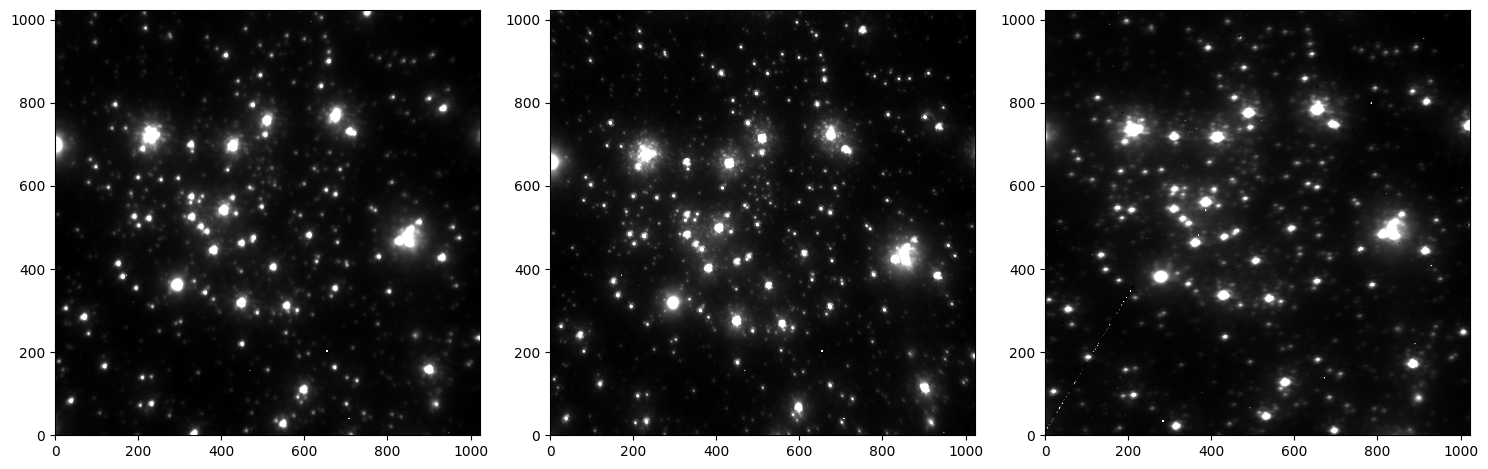

In [ ]:
# --- Plot the data, img0 will be our reference image ---
# First, fetch the data for each image
img0 = fits.getdata(sci_directory + sci_files[0])
img1 = fits.getdata(sci_directory + sci_files[1])
img2 = fits.getdata(sci_directory + sci_files[2])

# Now setup the figures, we will plot them side by side
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

# First image
axes[0].imshow(img0, origin='lower', vmin=np.percentile(img0, 1), vmax=np.percentile(img0, 99), cmap='gray')
axes[0].set_title('') # enter a title, for example: Year 2019

# Second image
axes[1].imshow(img1, origin='lower', vmin=np.percentile(img1, 1), vmax=np.percentile(img1, 99), cmap='gray')
axes[1].set_title('') # enter a title, for example: Year 2021

# Third image
axes[2].imshow(img2, origin='lower', vmin=np.percentile(img2, 1), vmax=np.percentile(img2, 99), cmap='gray')
axes[2].set_title('') # enter a title, for example: Year 2023

plt.tight_layout()

# This will show the image!
plt.show()

# Lets take a moment to think about what we are looking at
There are some important things to point out at this stage to make sense of what our next goal should be.

1. First, note that each image is *2 years apart*, so even though they look the same, stars *are moving*, some move quite a lot, and some barley move at all.

2. There are some very big/bright stars, and some very small/faint stars.

3. The images are *not perfectly aligned*, in other words, a star may appear to shift more than how much it actually moves.

4. What else can you notice? Discuss with a partner.

An easy and quick way to see the effects of (3.) is to take the difference between the images. Let's quickly try that:

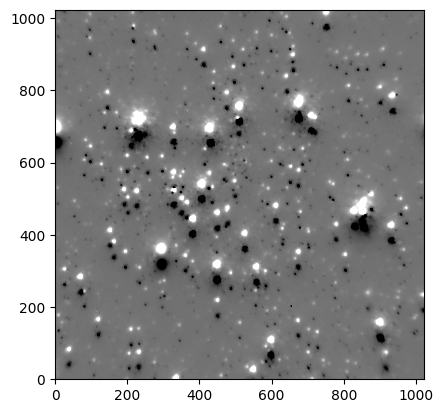

In [ ]:
# Subtract img0 and img1, call this a 'residual'
residual = img0 - img1

# If they are perfectly aligned, we shouldn't see significant holes or large stars still in the image
plt.figure()
plt.imshow(img0 - img1, vmin=np.percentile(img0-img1, 1), vmax=np.percentile(img0-img1, 99), cmap = 'gray', origin='lower')
plt.show()

What do you notice about the image? Can you tell that the images are not aligned? How would this image change if the images are aligned? **Discuss with a partner**

Given that these images are not aligned, and that our goal is to see how fast stars are *really* moving around the supermassive blackhole, our next goal is to **align these images!**

### Step 1: Aligning the images
Recall the thing we mentioned earlier, some stars are moving quite fast, and some are moving really, really slowly (so much so that they are nearly at the same position throughout the 4 years of our data). We can take advantage of this fact to align our images. If we take the same star in each image, and shift the entire frame such that the star is on the same pixel, our images should roughly be aligned. Let's do that!


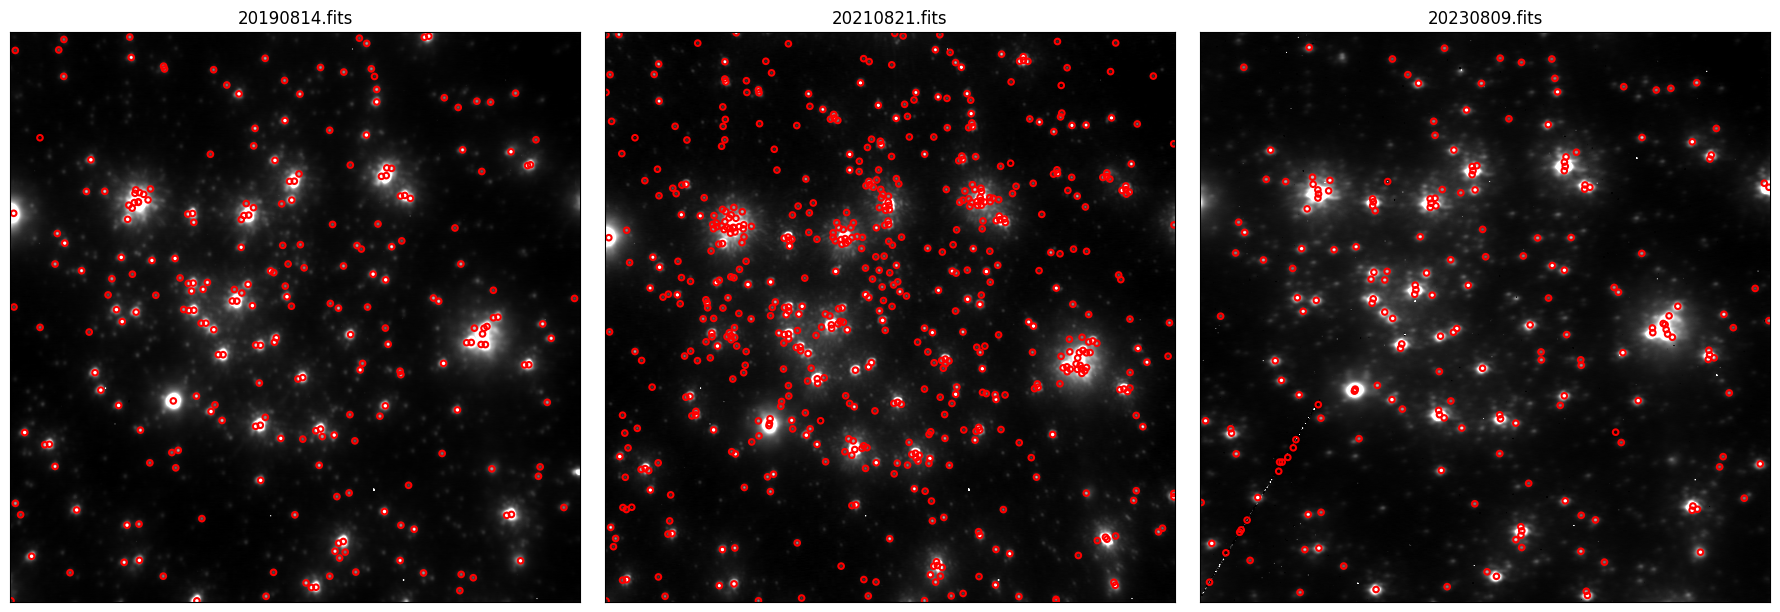

In [ ]:
# Processing the data:
# The data has some background noise that we don't want, so lets subtract it out

# --- Background subtraction ---
mean0, median0, std0 = sigma_clipped_stats(img0, sigma=3.0)
mean1, median1, std1 = sigma_clipped_stats(img1, sigma=3.0)
mean2, median2, std2 = sigma_clipped_stats(img2, sigma=3.0)

img0_sub = img0 - median0
img1_sub = img1 - median1
img2_sub = img2 - median2


# Analyzing the data:
# We will use a tool called 'DAOStarFinder' which will identify sources
# in our image that have brightness values above the background defined by
# some threshold. Let's say that a star should at least be 3x brighter than the
# surrounding noise.

# --- Run DAOStarFinder ---
daofind0 = DAOStarFinder(fwhm=4.0, threshold=3.0 * std0) # 3x surrounding noise (std0)
sources0 = daofind0(img0_sub) # find stars in the image

daofind1 = DAOStarFinder(fwhm=4.0, threshold= "fill in") # 3x surrounding noise (std1)
sources1 = daofind1(img1_sub) # find stars in the image

daofind2 = DAOStarFinder(fwhm=4.0, threshold="fill in") # 3x surrounding noise (std2)
sources2 = daofind2(img2_sub) # find stars in the image

# --- Plotting ---
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Helper function to plot
def show_sources(ax, img, sources, title):
    ax.imshow(img, origin='lower', cmap='gray',
              vmin=np.percentile(img, 1), vmax=np.percentile(img, 99))
    if sources is not None and len(sources) > 0:
        positions = np.transpose((sources['xcentroid'], sources['ycentroid']))
        apertures = CircularAperture(positions, r=5.0)
        apertures.plot(ax=ax, color='red', lw=1.5) # plotting circles around our detected stars
    ax.set_title(title)
    ax.set_xticks([])
    ax.set_yticks([])

show_sources(axes[0], img0_sub, sources0, sci_files[0])
show_sources(axes[1], img1_sub, sources1, sci_files[1])
show_sources(axes[2], img2_sub, sources2, sci_files[2])

plt.tight_layout()

# Show the image

plt.show()



We need to identify a star that is detected in each year to use as our reference star to align the images together. Open 20190814 in JS9 (https://js9.si.edu/) and choose a pixel location of a big, slow moving star (One recommendation is the star near x=525, y=402, but feel free to choose a different star). Then add that pixel location as x0 and y0 below.

### Img0

In [ ]:
# --- Reference location and radius ---
x0, y0 = 525, 402   # your reference pixel, edit or change
radius = 5       # choose a radius to search around, edit

# Filter sources within the radius, to do this, calculate the distances between each source
# using their x position: sources0["xcentroid"]
# and their y position: sources0["ycentroid"]
# from the reference pixel: x0 and y0

distances = # put in the distance calculation from each source to your reference pixel
mask = # put in that we want the distance from our reference pixel to be less than our radius
nearby_sources = sources0[mask]

print(f"Found {len(nearby_sources)} sources within {radius} pixels of ({x0}, {y0})")
print(nearby_sources[['xcentroid', 'ycentroid', 'flux']])

Found 1 sources within 5 pixels of (525, 402)
    xcentroid         ycentroid        flux  
----------------- ----------------- ---------
525.4179967046015 402.6331005288331 878777.44


A collection of sources within your given radius around your reference pixel should be reported above. Now we need to pick out the actual source closest to our reference pixel! In the cell below, add a line below to label/plot the reference pixel.

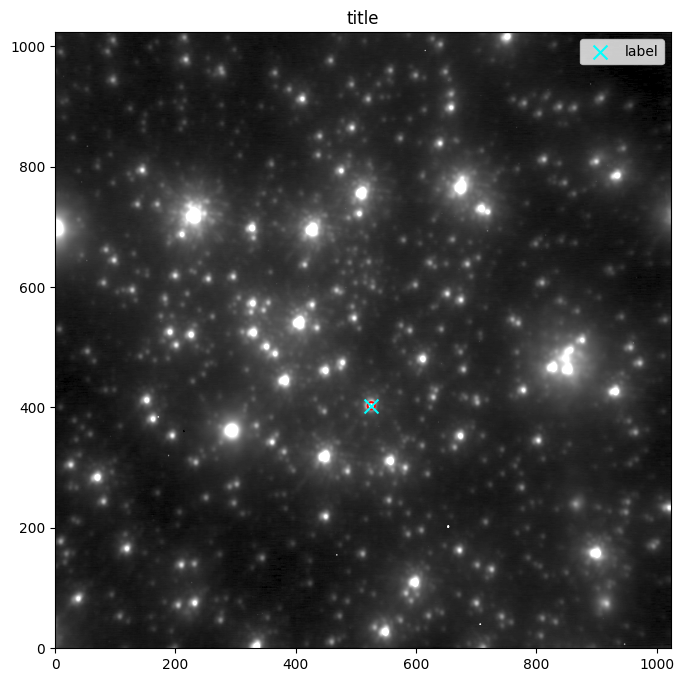

In [ ]:
# Plot up what sources are found and the centroid chosen

# Get positions of sources found
positions = np.transpose((nearby_sources['xcentroid'], nearby_sources['ycentroid']))

# Using circles to pin point sources on image
apertures = CircularAperture(positions, r=6)

# Normalizing the image to see it better
norm = simple_norm(img0_sub, 'sqrt', percent=99)

# Plotting up figure
plt.figure(figsize=(8, 8))
# plot your reference pixel here

# Show image
plt.imshow(img0_sub, origin='lower', cmap='gray', norm=norm)

# Show sources found
apertures.plot(color='red', lw=1.5)

# Add title
plt.title() # add a title

# Add legend
plt.legend()

# Show the image with the sources detected
plt.show()

In [ ]:
# If reference star is the only star found then pos0 should be:
pos0 = positions[0]

# If not, manually enter the x and y locations closest to your reference pixel from the list 2 cells above
pos0 = np.array([x_here, y_here]) # edit

### Img1
Repeat process for image 1

In [ ]:
# --- Reference location and radius ---
x0, y0 = 525, 358   # your reference pixel, edit or change
radius = 50          # choose a radius to search around, edit

# Filter sources within the radius, to do this, calculate the distances between each source
# using their x position: sources0["xcentroid"]
# and their y position: sources0["ycentroid"]
# from the reference pixel: x0 and y0

distances = # put in the distance calculation from each source to your reference pixel
mask = # put in that we want the distance from our reference pixel to be less than our radius
nearby_sources = sources0[mask]

print(f"Found {len(nearby_sources)} sources within {radius} pixels of ({x0}, {y0})")
print(nearby_sources[['xcentroid', 'ycentroid', 'flux']])

Found 4 sources within 50 pixels of (525, 358)
    xcentroid         ycentroid         flux  
----------------- ------------------ ---------
484.4595415104164  342.7779577636919  27016.52
531.8527448000907 354.63782944078594  91173.02
 518.438009178311  356.3327203927587  90806.08
525.1508902286396 358.12129232937673 1073365.0


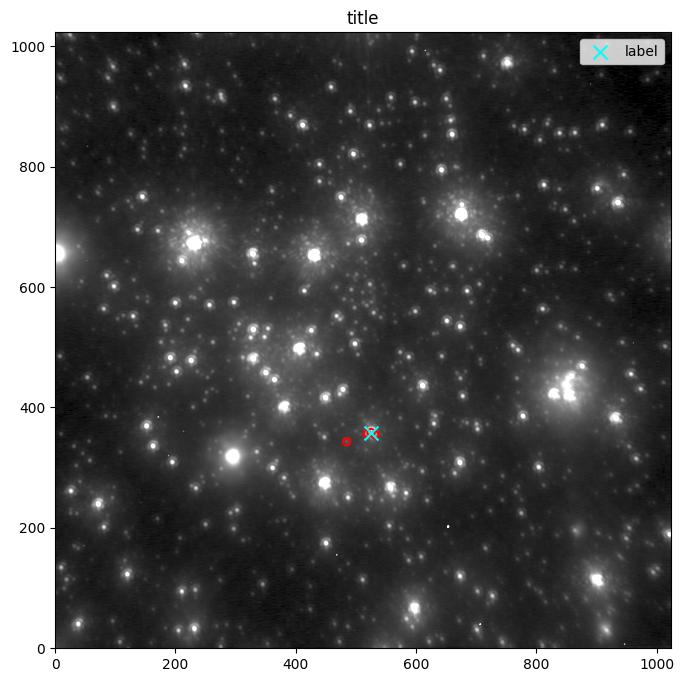

In [ ]:
# Plot up what sources are found and the centroid chosen

# Get positions of sources found
positions = np.transpose((nearby_sources['xcentroid'], nearby_sources['ycentroid']))

# Using circles to pin point sources on image
apertures = CircularAperture(positions, r=6)

# Normalizing the image to see it better
norm = simple_norm(img1_sub, 'sqrt', percent=99)

# Plotting up figure
plt.figure(figsize=(8, 8))
# plot your reference pixel here
plt...
# Show image
plt.imshow(img1_sub, origin='lower', cmap='gray', norm=norm)

# Show sources found
apertures.plot(color='red', lw=1.5)

# Add title
plt.title() # add a title

# Add legend
plt.legend()

# Show the image with the sources detected
plt.show()

In [ ]:
# If reference star is the only star found then pos0 should be:
pos1 = positions[0]

# If not, manually enter the x and y locations closest to your reference pixel from the list 2 cells above
pos1 = np.array([x_here, y_here]) # edit

### Img2
Repeat the same process for image 2

Found 1 sources within 50 pixels of (508, 419)
    xcentroid          ycentroid       flux  
------------------ ----------------- --------
507.13265291440035 419.3491770882664 553541.0


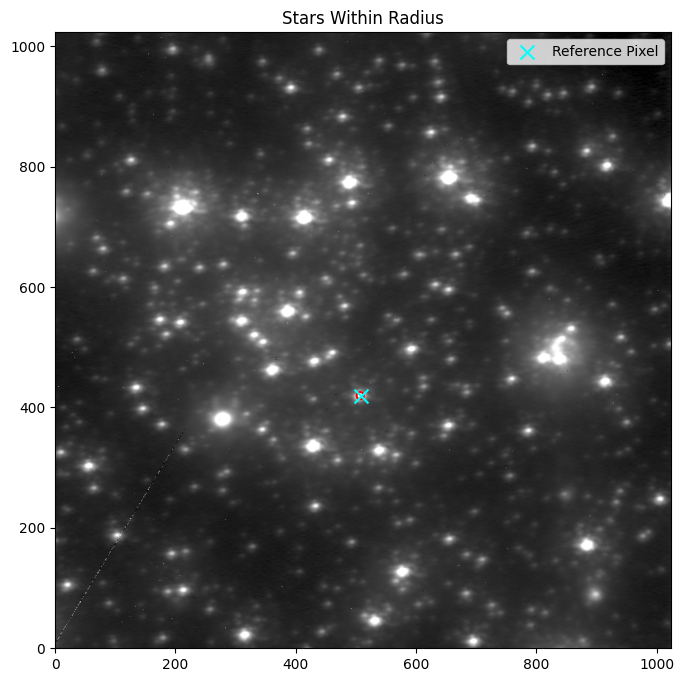

In [ ]:
# --- Reference location and radius ---
x0, y0 = 508, 419   # your reference pixel, edit or change
radius = 50          # choose a radius to search around, edit

# Filter sources within the radius, to do this, calculate the distances between each source
# using their x position: sources0["xcentroid"]
# and their y position: sources0["ycentroid"]
# from the reference pixel: x0 and y0

distances = # put in the distance calculation from each source to your reference pixel
mask = # put in that we want the distance from our reference pixel to be less than our radius
nearby_sources = sources0[mask]

print(f"Found {len(nearby_sources)} sources within {radius} pixels of ({x0}, {y0})")
print(nearby_sources[['xcentroid', 'ycentroid', 'flux']])

In [ ]:
# Plot up what sources are found and the centroid chosen

# Get positions of sources found
positions = np.transpose((nearby_sources['xcentroid'], nearby_sources['ycentroid']))

# Using circles to pin point sources on image
apertures = CircularAperture(positions, r=6)

# Normalizing the image to see it better
norm = simple_norm(img2_sub, 'sqrt', percent=99)

# Plotting up figure
plt.figure(figsize=(8, 8))
# plot your reference pixel here
plt...
# Show image
plt.imshow(img2_sub, origin='lower', cmap='gray', norm=norm)

# Show sources found
apertures.plot(color='red', lw=1.5)

# Add title
plt.title() # add a title

# Add legend
plt.legend()

# Show the image with the sources detected
plt.show()

In [ ]:
# If reference star is the only star found then pos0 should be:
pos2 = positions[0]

# If not, manually enter the x and y locations closest to your reference pixel from the list 2 cells above
pos2 = np.array([x_here, y_here]) # edit

With the location of the same star in each image found, we can now align the images to the reference image (the first one, image in 2019)

In [ ]:
# Compute shifts needed to align pos1 and pos2 to pos0
shift1 = # input here
shift2 = # input here

# Apply subpixel shifts to align images
aligned_img1 = shift(img1_sub, shift=shift1, order=3)  # order=3 = cubic interpolation
aligned_img2 = # do the same transformation for image2

# We don't need to align image0 to itself!
aligned_img0 = img0_sub

Okay, if all went well, these images should be *roughly* aligned. Let's do that same test we did earlier where we take the difference of two images to see if we aligned them right:

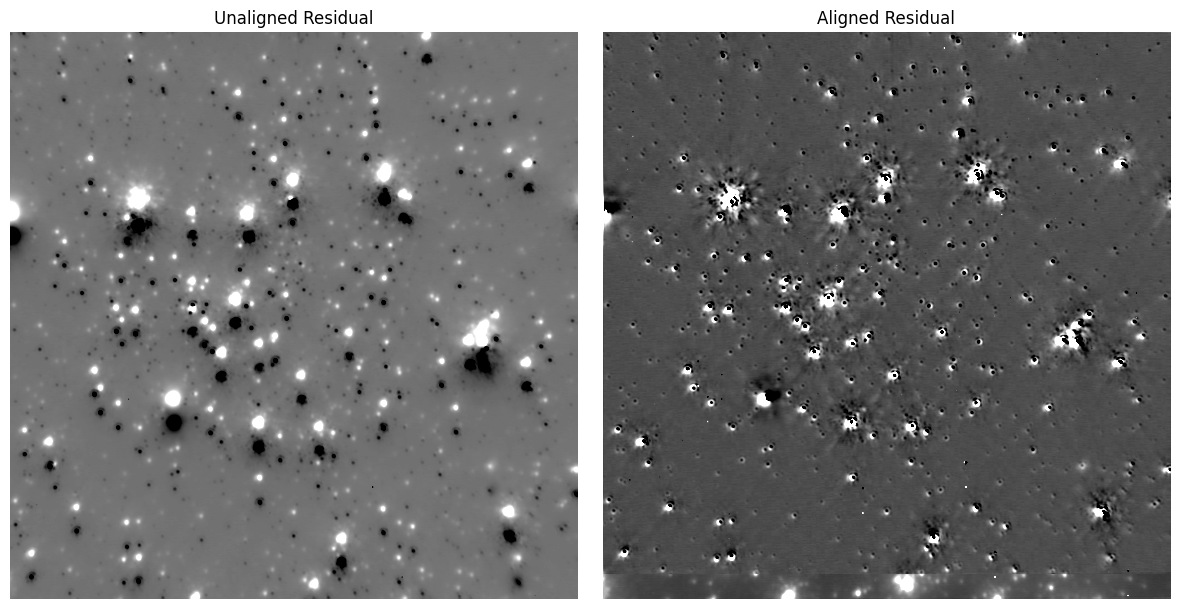

In [ ]:
residual_aligned = aligned_img0 - aligned_img1

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
# Unaligned residual
axes[0].imshow(residual, vmin = np.percentile(residual, 1), vmax = np.percentile(residual, 99), origin='lower', cmap='gray')
axes[0].set_title("Unaligned Residual")
axes[0].axis('off')

# Aligned residual with percentile stretch

axes[1].imshow(residual_aligned, vmin=np.percentile(residual_aligned, 1), vmax=np.percentile(residual_aligned, 99), origin='lower', cmap='gray')
axes[1].set_title("Aligned Residual")
axes[1].axis('off')

plt.tight_layout()
plt.show()

This alignment is probably not perfect, but that's okay, we just need it to be decent enough!

### Step 2: Tracking a moving star

Now that our images are aligned, we can track the real physical movement of a star to see how fast it is moving! The trick here, is to ensure that we are tracking the *same star* across the three years of data. Accidentally choosing a different star will throw our result way off! Let's start by analyzing the aligned images again:

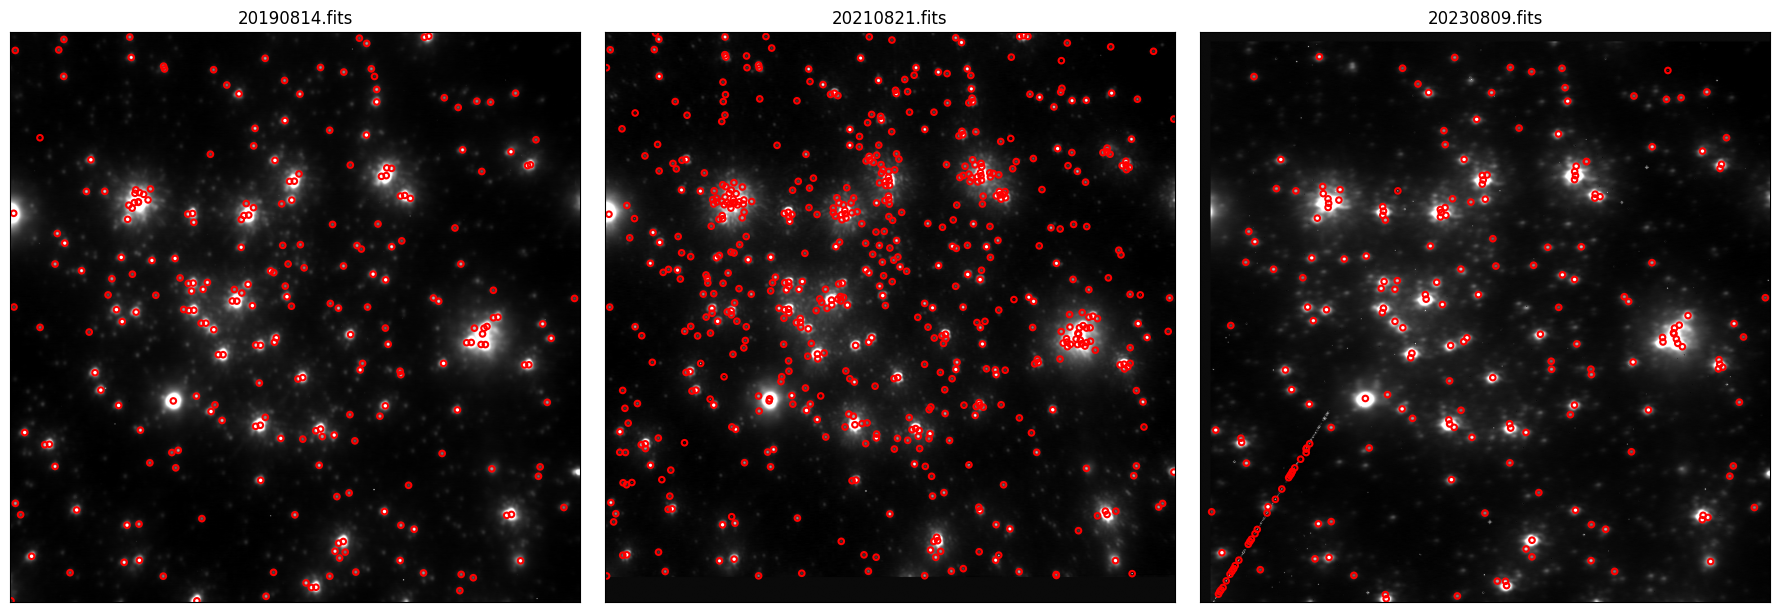

In [ ]:
# --- Run DAOStarFinder ---
daofind0 = DAOStarFinder(fwhm=4.0, threshold=3.0 * std0)
sources0 = daofind0(aligned_img0)

daofind1 = DAOStarFinder(fwhm=4.0, threshold="fill in")
sources1 = daofind1(aligned_img1)

daofind2 = DAOStarFinder(fwhm=4.0, threshold="fill in")
sources2 = daofind2(aligned_img2)

# --- Plotting ---
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Helper function to plot
def show_sources(ax, img, sources, title):
    ax.imshow(img, origin='lower', cmap='gray',
              vmin=np.percentile(img, 1), vmax=np.percentile(img, 99))
    if sources is not None and len(sources) > 0:
        positions = np.transpose((sources['xcentroid'], sources['ycentroid']))
        apertures = CircularAperture(positions, r=5.0)
        apertures.plot(ax=ax, color='red', lw=1.5)
    ax.set_title(title)
    ax.set_xticks([])
    ax.set_yticks([])

show_sources(axes[0], aligned_img0, sources0, "ENTER TITLE HERE")
show_sources(axes[1], aligned_img1, sources1, "ENTER TITLE HERE")
show_sources(axes[2], aligned_img2, sources2, "ENTER TITLE HERE")

plt.tight_layout()
plt.show()



Now we need to open the reference image (20190814) in JS9 (https://js9.si.edu) and choose a star that is close to the dynamical center, preferably a small, faint, fast moving star. The dynamical center is located roughly at:

$$x = 523$$
$$y = 630$$

search for stars around this location!

*Optional:* To help identify the same star in each image, one option is we can look at an animation of our three aligned images

In [1]:
# Your aligned images
images = [aligned_img0, aligned_img1, aligned_img2]
# Cutout parameters
center_y, center_x = 523, 630  # dynamical center
radius = 100 # or change this to whatever you want
# Create output directory for frames
frame_dir = 'gif_frames'
os.makedirs(frame_dir, exist_ok=True)
# Generate cutout frames
frame_paths = []
for i, img in enumerate(images):
    xmin = center_x - radius
    xmax = center_x + radius
    ymin = center_y - radius
    ymax = center_y + radius
    fig, ax = plt.subplots(figsize=(4, 4))
    ax.imshow(img, cmap='gray', origin='lower',
              vmin=np.percentile(cutout, 1), vmax=np.percentile(cutout, 99))
    ax.set_title(f'Frame {i}')
    ax.axis('off')
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.scatter(center_x, center_y, marker = 'x', s=100, color = 'cyan')
    frame_path = os.path.join(frame_dir, f'frame_{i}.png')
    fig.savefig(frame_path, bbox_inches='tight', pad_inches=0)
    plt.close(fig)
    frame_paths.append(frame_path)
# Create GIF
gif_path = 'aligned_cutout.gif'
with imageio.get_writer(gif_path, mode='I', duration=10.0) as writer:
    for frame in frame_paths:
        writer.append_data(imageio.imread(frame))
print(f'GIF saved to: {gif_path}')

NameError: name 'aligned_img0' is not defined

For each aligned_img, we will keep the reference pixel location (x0 and y0) be the dynamical center (x0 = 523, y0 = 630) and will just change the search radius to find the same star in each image (ideally, we want the closest, brightest star we can find!)

# aligned_img0

Found 1 sources within 20 pixels of (523, 630)
    xcentroid         ycentroid       flux  
----------------- ----------------- --------
521.1440693394132 641.5000929948084 66299.94


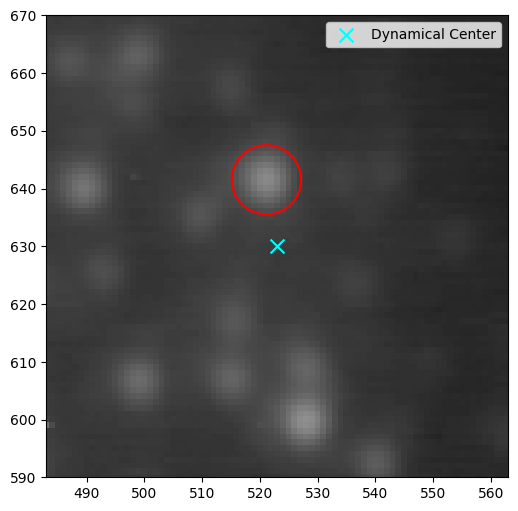

In [ ]:
# --- Reference location and radius ---
x0, y0 =    # dynamical center
radius =       # radius to search around (recommend 20 to start), edit/change

# --- Filter sources within the radius ---
distances = # put in the distance calculation from each source to your reference pixel
mask = # ensure that the distances are less than the radius
nearby_sources = sources0[mask]

print(f"Found {len(nearby_sources)} sources within {radius} pixels of ({x0}, {y0})")
print(nearby_sources[['xcentroid', 'ycentroid', 'flux']])

In [ ]:
# Plot up what sources are found and the centroid chosen
# If the reference star is successfully the only source identified, then we can save its pixel location
# Plot up what sources are found and the centroid chosen
positions = np.transpose((nearby_sources['xcentroid'], nearby_sources['ycentroid']))
apertures = CircularAperture(positions, r=6)

# Define display limits using the radius
x_min = int(x0 - radius - 20)
x_max = int(x0 + radius + 20)
y_min = int(y0 - radius - 20)
y_max = int(y0 + radius + 20)

# Plot zoomed-in image region

# Normalize the image to see it better
norm = simple_norm(aligned_img0, 'sqrt', percent=99)

# Plot the figure
plt.figure(figsize=(6, 6))
plt.imshow(aligned_img0, origin='lower', cmap='gray', norm=norm)

# Limit the display to a square around the reference point
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

# Plot apertures and reference mark
apertures.plot(color='red', lw=1.5)
# plot and label the 'dynamical center'
plt.legend()
plt.show()

In [ ]:
# --- If star is found then ---
pos0 = positions[0]

# If not, manually enter x and y 2 cells above
pos0 = np.array([x_here, y_here]) # edit

# aligned_img1

Found 4 sources within 20 pixels of (523, 630)
    xcentroid         ycentroid        flux  
----------------- ----------------- ---------
518.1923561511597 613.6048290716949 48276.516
525.5556281981756  619.272336096011 37526.684
511.2956764883977 635.3889481195633 29504.139
523.3497847991812 648.8081044112475  97583.06


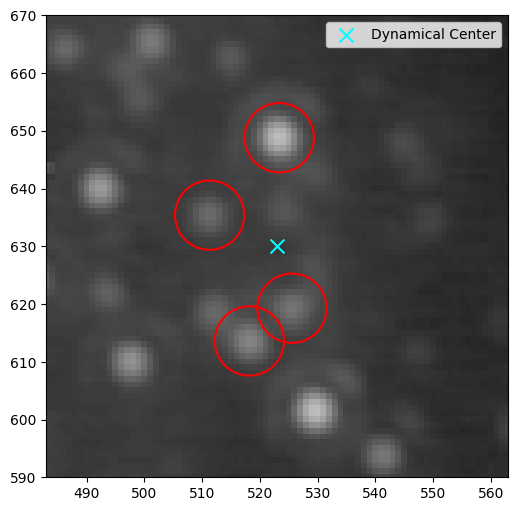

In [ ]:
# --- Reference location and radius ---
x0, y0 =    # dynamical center
radius =    # radius to search around edit/change

# --- Filter sources within the radius ---
distances = # put in the distance calculation from each source to your reference pixel
mask = # ensure that distances are less than the radius
nearby_sources = sources1[mask]

print(f"Found {len(nearby_sources)} sources within {radius} pixels of ({x0}, {y0})")
print(nearby_sources[['xcentroid', 'ycentroid', 'flux']])

In [ ]:
# Plot up what sources are found and the centroid chosen
# If the reference star is successfully the only source identified, then we can save its pixel location
# Plot up what sources are found and the centroid chosen
positions = np.transpose((nearby_sources['xcentroid'], nearby_sources['ycentroid']))
apertures = CircularAperture(positions, r=6)

# Define display limits using the radius
x_min = int(x0 - radius - 20)
x_max = int(x0 + radius + 20)
y_min = int(y0 - radius - 20)
y_max = int(y0 + radius + 20)

# Plot zoomed-in image region
norm = simple_norm(aligned_img1, 'sqrt', percent=99)

# Plot figure
plt.figure(figsize=(6, 6))
plt.imshow(aligned_img1, origin='lower', cmap='gray', norm=norm)

# Limit the display to a square around the reference point
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

# Plot apertures and reference mark
apertures.plot(color='red', lw=1.5)
# plot/label the 'dynamical center'
plt.legend()
plt.show()

In [ ]:
# --- If star is found then ---
pos1 = positions[0]

# If not, manually enter x and y 2 cells above
pos1 = np.array([x_here, y_here]) # edit

# aligned_img2

Found 2 sources within 30 pixels of (523, 630)
    xcentroid         ycentroid            flux       
----------------- ----------------- ------------------
531.0575836265141 603.0418981456945   45801.3162404664
525.6034521940963 652.1828902163284 46418.809396322366


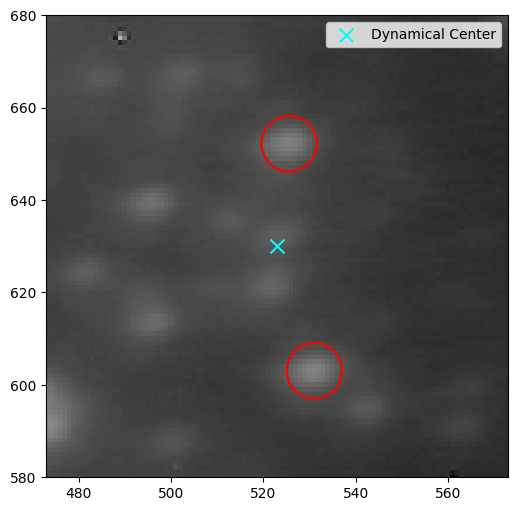

In [ ]:
# --- Reference location and radius ---
x0, y0 =    # dynamical center
radius =    # radius to search around, edit/change

# --- Filter sources within the radius ---
distances = # put in the distance calculation from each source to your reference pixel
mask = # ensure that the distances are less than the radius
nearby_sources = sources2[mask]

print(f"Found {len(nearby_sources)} sources within {radius} pixels of ({x0}, {y0})")
print(nearby_sources[['xcentroid', 'ycentroid', 'flux']])

In [ ]:
# Plot up what sources are found and the centroid chosen
# If the reference star is successfully the only source identified, then we can save its pixel location
# Plot up what sources are found and the centroid chosen

# Positions of sources
positions = np.transpose((nearby_sources['xcentroid'], nearby_sources['ycentroid']))
apertures = CircularAperture(positions, r=6)

# Define display limits using the radius
x_min = int(x0 - radius - 20)
x_max = int(x0 + radius + 20)
y_min = int(y0 - radius - 20)
y_max = int(y0 + radius + 20)

# Plot zoomed-in image region

# Normalize the image to see it better
norm = simple_norm(aligned_img2, 'sqrt', percent=99)

# Plot the figure
plt.figure(figsize=(6, 6))
plt.imshow(aligned_img2, origin='lower', cmap='gray', norm=norm)

# Limit the display to a square around the reference point
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

# Plot apertures and reference mark
apertures.plot(color='red', lw=1.5)
# Plot the dynamical center
plt.legend()
plt.show()

In [ ]:
# --- If star is found then ---
pos2 = positions[0]

# If not, manually enter x and y 2 cells above
pos2 = np.array([x_here, y_here]) # edit

Lets make a plot of the position of this star as a function of time

First, convert years to decimal years. We want to do this just to make it easier to talk about time in python. You can do math with floats, but not strings!

In [ ]:
# Input date string
date0 = "2019-08-14"
date1 = "2021-08-21"
date2 = "2023-08-09"

# Convert to astropy Time object
t0 = Time(date0)
t1 = Time(date1)
t2 = Time(date2)

# Get decimal year
date0 = t0.decimalyear
date1 = t1.decimalyear
date2 = t2.decimalyear

date = [date0, date1, date2]

# Normalize the time such that the first epoch is year 0
t = np.array([d - date0 for d in date])

Next organize the positions of our moving star

In [ ]:
pos = np.array([pos0, pos1, pos2])

Now we'll initialize the dynamical center to be x = 523 and y = 630

In [ ]:
ref = [523, 630]

Lets plot it!

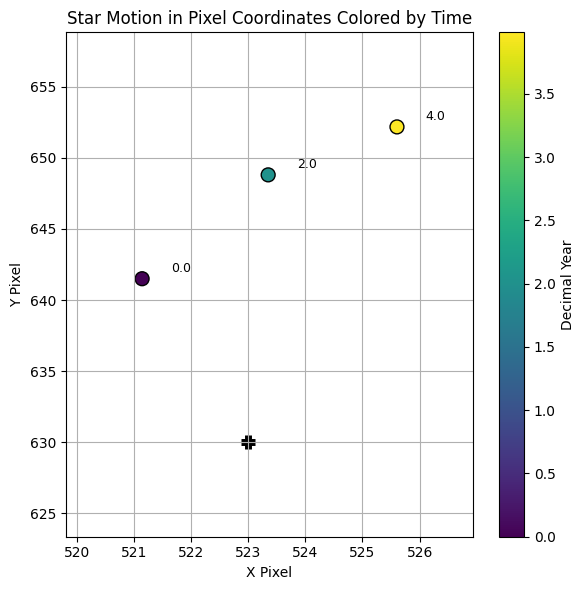

In [ ]:
# Extract x and y from positions
x_vals = pos[:, 0]
y_vals = pos[:, 1]

# Create colormap normalized to the time range
norm = colors.Normalize(vmin=t.min(), vmax=t.max())
cmap = cm.viridis

# Plot
plt.figure(figsize=(6, 6))
sc = # Enter the points of your star here


# Plot the dynamical center
plt.scatter(ref[0], ref[1], marker = "+", s = 100, color = "black", linewidth = 5)

# Label each point with the year
for x, y, d in zip(x_vals, y_vals, t):
    plt.text(x + 0.5, y + 0.5, f"{d:.1f}", fontsize=9)

# Add colorbar
cbar = plt.colorbar(sc)
cbar.set_label('Decimal Year')

# Formatting
plt.xlabel('X Pixel')
plt.ylabel('Y Pixel')
plt.title() # input a title
plt.grid(True)
ax = plt.gca()
ax.margins(x=0.3, y=0.3)
plt.tight_layout()
plt.show()

### Step 3: Getting a physical velocity from our measurements

What we should have now is star motion with respect to the dynamical center in units of pixels per year. The amount of pixels depends on what kind of detector we are using and so can change if we used a different detector. In science we always want to communicate in terms that everyone can understand, so we need to convert the pixels into something more fundamental --> *arcseconds*

To do this, we need to know the conversion from pixels to arcseconds (this is called the *plate scale* of the detector).

We are using the instrument called NIRC2 mounted on the Keck telescopes (instrument page here: https://www2.keck.hawaii.edu/inst/nirc2/). The plate scale is *0.009942 arcseconds/pixel*.

Let's go ahead and get everything in terms of arcseconds. First, lets define the dynamical center from (523, 630) pixels to (0,0) arcseconds, since it is our reference point.

Next, let's see what the offset in pixels is from this reference point to each point

In [ ]:
offsets_pix = pos - ref
offsets_pix

array([[-1.85593066, 11.50009299],
       [ 0.3497848 , 18.80810441],
       [ 2.60345219, 22.18289022]])

Now convert these pixels into arcseconds

In [ ]:
offsets_arcseconds = offsets_pix * 0.009942
offsets_arcseconds

array([[-0.01845166,  0.11433392],
       [ 0.00347756,  0.18699017],
       [ 0.02588352,  0.22054229]])

Now plot the same figure as before but now our axes will be offset arcseconds from the dynamical center color coded with time:

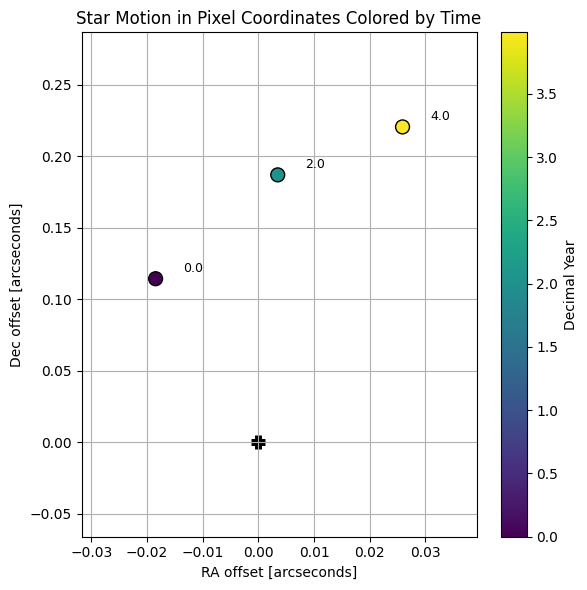

In [ ]:
# Extract x and y from positions
x_vals = offsets_arcseconds[:, 0]
y_vals = offsets_arcseconds[:, 1]

# Create colormap normalized to the time range
norm = colors.Normalize(vmin=t.min(), vmax=t.max())
cmap = cm.viridis

# Plot
plt.figure(figsize=(6, 6))
sc = # input your plot of the offset arcseconds here


# Plot the dynamical center
plt.scatter(0, 0, marker = "+", s = 100, color = "black", linewidth = 5)

# Label each point with the year
for x, y, d in zip(x_vals, y_vals, t):
    plt.text(x + 0.005, y + 0.005, f"{d:.1f}", fontsize=9)

# Add colorbar
cbar = plt.colorbar(sc)
cbar.set_label('Decimal Year')

# Formatting
plt.xlabel('RA offset [arcseconds]')
plt.ylabel('Dec offset [arcseconds]')
plt.title() # input title
plt.grid(True)
ax = plt.gca()
ax.margins(x=0.3, y=0.3)
plt.tight_layout()
plt.show()

Now we can obtain something called *proper motion* of this star (arcseconds / year) which can be thought of as a type of velocity. We can do this by fitting a line through the RA vs time and Dec vs time data.



![](images.png)

In [ ]:
# Fit a line to x(t) and y(t) separately: x = mu_x * t + x0
# Try to estimate this roughly on your own first!

# Optional: plot data and fits
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.scatter(t, offsets_arcseconds[:,0], color='blue', label='Data')
plt.xlabel('Years since 2019')
plt.ylabel('RA Offset [arcsec]')
plt.title() # input title
plt.legend()
plt.grid()

plt.subplot(1,2,2)
plt.scatter(t, offsets_arcseconds[:,1], color='green', label='Data')
plt.xlabel('Years since 2019')
plt.ylabel('Dec Offset [arcsec]')
plt.title() # input title
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

Using the points in the plots above, compute the equations for the line fit to RA offset vs time and Dec offset vs time. Input your answer in the cell below

In [ ]:
mu_x = # your proper motion in RA offset estimate (slope of the line)
mu_y = # your proper motion in Dec offset estimate (slope of the line)

Now, we'll do the same exercise using a fitting tool called *polyfit*. Compare your result from the cell above to this new result from polyfit

Proper motion in RA:  0.0111 arcsec/year
Proper motion in Dec: 0.0267 arcsec/year


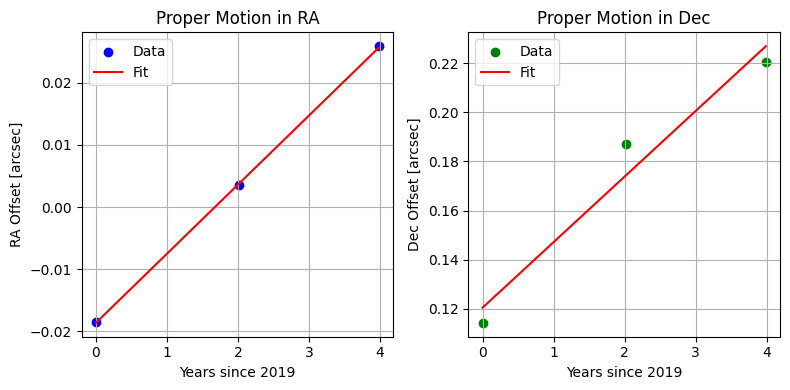

In [ ]:
# Fit a line to x(t) and y(t) separately: x = mu_x * t + x0
# Try to estimate this roughly on your own first!


coeff_x = np.polyfit(t, offsets_arcseconds[:, 0], 1)
coeff_y = np.polyfit(t, offsets_arcseconds[:, 1], 1)

mu_x = coeff_x[0]  # proper motion in RA offset (arcsec/year)
mu_y = coeff_y[0]  # proper motion in Dec offset (arcsec/year)

print(f"Proper motion in RA (polyfit result):  {mu_x:.4f} arcsec/year")
print(f"Proper motion in Dec (polyfit result): {mu_y:.4f} arcsec/year")

print(f"Proper motion in RA (your result):  {ENTER YOUR RESULT FROM ABOVE} arcsec/year")
print(f"Proper motion in Dec (your result): {ENTER YOUR RESULT FROM ABOVE} arcsec/year")

# Optional: plot data and fits
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.scatter(t, offsets_arcseconds[:,0], color='blue', label='Data')
plt.plot(t, np.polyval(coeff_x, t), 'r-', label='Fit')
plt.xlabel('Years since 2019')
plt.ylabel('RA Offset [arcsec]')
plt.title() # input title
plt.legend()
plt.grid()

plt.subplot(1,2,2)
plt.scatter(t, offsets_arcseconds[:,1], color='green', label='Data')
plt.plot(t, np.polyval(coeff_y, t), 'r-', label='Fit')
plt.xlabel('Years since 2019')
plt.ylabel('Dec Offset [arcsec]')
plt.title() # input title
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


![](images-2.png)

In [ ]:
# Now the final proper motion we want is the hypotenuse of our proper motion in x and y. How can we find that?
# Input the formula below:

proper_motion =  #edit
proper_motion

0.028909068800104385

### Step 4: Going from velocity, to mass

So the proper motion is about (edit here):

$$\mu = $$

We can now convert this to a transverse velocity by using the known distance to the galactic center. The distance to the galactic center is :

$$d = 8200 pc$$

And the formula to go from proper motion to transverse velocity (in km/s) is :

$$v_t = \mu * 4.74 * d$$

In [ ]:
d = 8200
v = # input formula here
v

1123.6376861224571

Assuming Keplerian motion and a bound system, we know from kepler's laws that

$$v = \sqrt{\frac{GM}{a}}$$

Where G is the gravitational constant, M is the mass of the central object (in this case, what this star is orbiting), and a is the distance from the star to the central object.

In [ ]:
x, y = offsets_arcseconds["choose 0-2"] # choose one of the three distances in arcseconds (doesn't really matter all too much)
a = # Compute a from x, y and convert this from arcseconds to distance in meters (m)
G =  # define the gravitational constant
v = # convert our velocity from km/s to m/s

In [ ]:
M = # solve for the mass
M

4.354374203377579e+36

a useful unit for mass in astronomy is solar mass. Convert the above number into units of solar masses

$$M_{\odot} = 2 \times 10^{30} kg$$

In [ ]:
M = M / "conversion factor here"
M

2177187.1016887897

# The mass of the supermassive black hole at the center of the Milky-Way galaxy must be somewhere around M = (edit)

### Some final notes
CONGRATS! You did it! The mass you found here should be on the order of a million solar masses. That's really big. The methods that we used here are similar in concept to the methods used in the official paper that discovered this object: https://iopscience.iop.org/article/10.1086/306528/pdf (although our approach was much more crude). We should note some things about our result:

1. This is technically the "mass enclosed", not the actual mass of the supermassive black hole. What that means is that the mass within the distance we chose (a) includes the supermassive black hole, but also other things that we might not see currently, like smaller fainter stars, or other weird objects that influence gravity. **Nonetheless, something big is in a small region of space!**

2. We found the *transverse* velocity of the star, **not the total velocity**. The transverse velocity is its velocity across the plane of the sky. This star could very well be moving *towards or away from us too!* (i.e., line of sight velocity). If we took this into account, our answer would probably change a bit. However, we obtained a pretty close result anyways! (**How could we measure the line of sight velocity of these stars using other methods discussed in this workshop? Discuss with a partner)**

3. We assumed that the orbit of this star was nearly circular, which as we learned from the beginning, isn't really true. In fact, some of these stars orbit at very high eccentricites! In order to get a more accurate estimate of the mass, we would have to consider many more things about the star's orbital motion in addition to its period and semi-major axis (**What are some things about the orbit we did not consider? Discuss with a partner)**
